Calculating the Hausdorff distances...
	diameter = 1.0E-01, distance = 1.11E+01
	diameter = 1.6E-02, distance = 1.76E+00
	diameter = 2.5E-03, distance = 2.78E-01
	diameter = 4.0E-04, distance = 4.41E-02
	diameter = 6.3E-05, distance = 7.00E-03
	diameter = 1.0E-05, distance = 1.12E-03
Done!


Convergence Order:0.9990894078151459 prefactor K:110.32670095802615


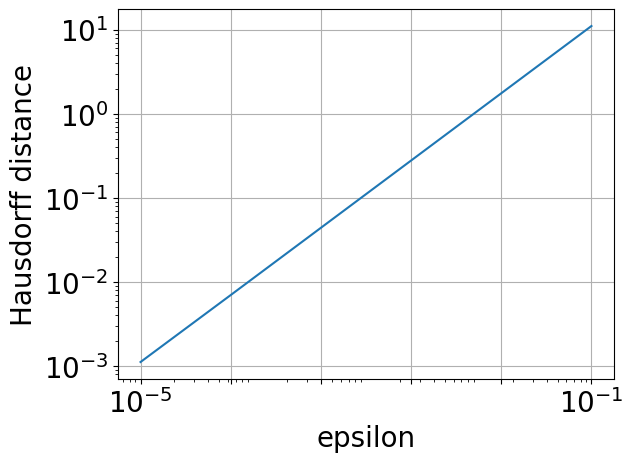

Crude Selection executed


In [1]:
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from NSPLIB.src.instances.crude_selection.crude_selection import const_model
from graphing.helper import convergence_analysis
crude_obj = -18350.146929611754
crude_sol = {f'crudeQuantity[{i}]': 0. for i in range(1, 10 + 1)}
crude_sol['crudeQuantity[2]'] = 150.87595641747944
crude_sol['crudeQuantity[3]'] = 201.29570746971186
crude_sol['crudeQuantity[4]'] = 56.18456149457359
crude_sol['crudeQuantity[8]'] = 162.2466500589715
crude_sol['crudeQuantity[10]'] = 18.848116800048512
crude_y_bound = {
    'crudeQuantity[1]': [0, 201.29570747217807],
    'crudeQuantity[2]': [0, 212.48012718600953],
    'crudeQuantity[3]': [0, 201.29570747217807],
    'crudeQuantity[4]': [0, 199.57869634340224],
    'crudeQuantity[5]': [0, 210.54848966613673],
    'crudeQuantity[6]': [0, 222.1383147853736],
    'crudeQuantity[7]': [0, 196.7885532591415],
    'crudeQuantity[8]': [0, 208.54531001589828],
    'crudeQuantity[9]': [0, 204.3720190779014],
    'crudeQuantity[10]': [0, 210.2623211446741]
}

sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
binary_y_val = {y: 0 for y in binary_ys}
binary_y_val['pickCrude[2]'] = 1
binary_y_val['pickCrude[3]'] = 1
binary_y_val['pickCrude[4]'] = 1
binary_y_val['pickCrude[8]'] = 1
binary_y_val['pickCrude[10]'] = 1
m.fix_binary_y(binary_y_val)
updated_y_bound=m.y_bound
updated_y_bound['crudeQuantity[1]']=(0,0)
updated_y_bound['crudeQuantity[5]']=(0,0)
updated_y_bound['crudeQuantity[6]']=(0,0)
updated_y_bound['crudeQuantity[7]']=(0,0)
updated_y_bound['crudeQuantity[9]']=(0,0)
m.update_y_bound(updated_y_bound)
alg=CaoZavalaAlgo(m,solver="baron")
convergence_analysis(alg,crude_sol,crude_obj,start=-5,stop=-1,steps=6,name="Crude")
print("Crude Selection executed")